## Figure 13: 

Temperature change due to cloud-radiative heating derived as mass-weighted vertical average over the depth of the troposphere. The change is calculated as the temperature in the CRH simulation minus the REF simulation. Note that the scale of the temperature change at day 3 is ten times smaller than for the other days.

---
@ Behrooz Keshtgar, KIT 2022

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore")
import colorlegend

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.19.1
matplotlib: 3.3.0


## 2- loading datasets

In [3]:
# Dictionary for loading simulations
simdict = {
         'LC1-channel-4000x9000km-2km-0002' : {'res':'2km', 'radiation':0, 'rh':0.8}, # No radiation
         'LC1-channel-4000x9000km-2km-0003' : {'res':'2km', 'radiation':1, 'rh':0.8}, # Only cloud radiation
          }
# Function to load wind and temperature datasets
def load_simulations():
    ds_temp = []
    for sim in list(simdict.keys()): 
        print('Working on loading data for', sim)
        # loading remapped datasets (0.5x0.5 r)
        path = '/work/bb1135/from_Mistral/bb1135/b381185/output/LC1_Limited_channel/icon-v.2.6.2.2_2km/sim_list_output/'+sim+'_remapped_0.5x0.5/'
        fname = path+'icon-fg*.nc'                                                                          
        ds_var = xr.open_mfdataset(fname)[['u','temp','u','v','pres']]
        ds_temp.append(ds_var)
        del fname,ds_var
    return ds_temp
#----------------------------------
ds_temp = load_simulations()
#----------------------------------
# pressure thickness
tmp = ds_temp[1].pres.values
dp = np.zeros(tmp.shape) * np.nan
dp[:,1:-1,...] = (tmp[:,2:,...] - tmp[:,:-2,...]) 
dp[:,0,...] = (tmp[:,1,...] - tmp[:,0,...]) 
dp[:,-1,...] = (tmp[:,-1,...] - tmp[:,-2,...])

Working on loading data for LC1-channel-4000x9000km-2km-0002
Working on loading data for LC1-channel-4000x9000km-2km-0003


In [4]:
# loading 2d datasets
def load_simulations():
    ds_sfcp = []
    for sim in list(simdict.keys()): 
        print('Working on loading data for', sim)
        # loading remapped datasets (0.5x0.5 r)
        path = '/work/bb1135/from_Mistral/bb1135/b381185/output/LC1_Limited_channel/icon-v.2.6.2.2_2km/sim_list_output/'+sim+'_remapped_0.5x0.5/'
        fname = path+'icon-atm2d*.nc'                                                                     
        ds_var = xr.open_mfdataset(fname)[['pres_sfc']]
        ds_sfcp.append(ds_var)
        del fname,ds_var
    return ds_sfcp
#----------------------------------
ds_list_atm2d = load_simulations()

Working on loading data for LC1-channel-4000x9000km-2km-0002
Working on loading data for LC1-channel-4000x9000km-2km-0003


## 3- Plot

In [5]:
# surface_pressure averaged between the two simulation
p_sfc_mean = (ds_list_atm2d[0].pres_sfc + ds_list_atm2d[1].pres_sfc)/2
# deriving temperature anomalies
t_anomaly = []
u_anomaly = []
# time steps
t1 = [72,96,120,144]
i = 0
for t in [20210104,20210105,20210106,20210107]:
    diff = ((ds_temp[1].temp.sel(time=t) - ds_temp[0].temp.sel(time=t)).isel(height=slice(30,75))*dp[t1[i],30:75,:,:]).sum('height')/dp[t1[i],30:75,:,:].mean(axis=(1,2)).sum() # only troposphere
    t_anomaly.append(diff)
    i = i + 1

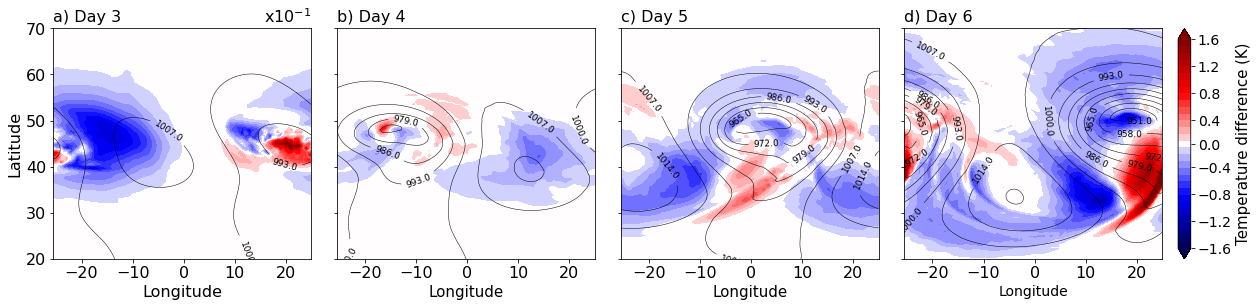

In [59]:
clevels = np.arange(-1.6,1.7,0.1)
clevels = np.delete(clevels, [16])
lon = ds_temp[0].lon.values
lat = ds_temp[0].lat.values
#--------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 4))

cbar_num_format = "%.0e"
i = 0

for ax in axes.flat:
    
    if i in [0,1,2,3]:
        ax.tick_params(labelsize=16)
        ax.set_ylim([20, 70])
        ax.set_yticks(np.arange(20,80,10))
        ax.set_xticks(np.arange(-20,30,10))
        
    if i == 0:
        im = ax.contourf(lon-38,lat,t_anomaly[0]*10,levels=clevels,extend='both'
                          ,cmap=plt.cm.get_cmap('seismic'))
        cs1 = ax.contour(lon-38,lat,p_sfc_mean.sel(time='20210104')/100
                        ,colors='k',linewidths=0.5,levels=np.arange(930,1027,7))
        ax.clabel(cs1, inline=1, fontsize=9,fmt='%1.1f')
        ax.set_ylabel('Latitude', fontsize=16)
        ax.set_xlabel('Longitude', fontsize=16)
        ax.text(0.0, 1.03, 'a) Day 3', transform=ax.transAxes, 
            size=16)
        ax.set_title('x10$^{-1}$',fontsize=16,loc='right')

            
    if i == 1:
        im = ax.contourf(lon-38,lat,t_anomaly[1],levels=clevels,extend='both'
                          ,cmap=plt.cm.get_cmap('seismic'))
        cs1 = ax.contour(lon-38,lat,p_sfc_mean.sel(time='20210105')/100
                        ,colors='k',linewidths=0.5,levels=np.arange(930,1027,7))
        ax.clabel(cs1, inline=1, fontsize=9,fmt='%1.1f')      
        ax.set_xlabel('Longitude', fontsize=15)
        ax.set_yticklabels([])
        
        ax.text(0.0, 1.03, 'b) Day 4', transform=ax.transAxes, 
            size=16)
        
    if i == 2:
        im = ax.contourf(lon-38,lat,t_anomaly[2],levels=clevels,extend='both'
                          ,cmap=plt.cm.get_cmap('seismic'))
        
        cs1 = ax.contour(lon-38,lat,p_sfc_mean.sel(time='20210106')/100
                        ,colors='k',linewidths=0.5,levels=np.arange(930,1027,7))
        ax.clabel(cs1, inline=1, fontsize=9,fmt='%1.1f')      
        ax.set_xlabel('Longitude', fontsize=15)
        ax.set_yticklabels([])       
        ax.text(0.0, 1.03, 'c) Day 5', transform=ax.transAxes, 
            size=16)
        
    if i == 3:
        im = ax.contourf(lon-38,lat,t_anomaly[3],levels=clevels,extend='both'
                          ,cmap=plt.cm.get_cmap('seismic'))
       
        cs1 = ax.contour(lon-38,lat,p_sfc_mean.sel(time='20210107')/100
                        ,colors='k',linewidths=0.5,levels=np.arange(930,1027,7))
        ax.clabel(cs1, inline=1, fontsize=9,fmt='%1.1f')      
        ax.set_xlabel('Longitude', fontsize=14)
        ax.set_yticklabels([])
        ax.text(0.0, 1.03, 'd) Day 6', transform=ax.transAxes, 
            size=16)
        
    i = i + 1 
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.1, hspace=0.12) 

cb_ax1 = fig.add_axes([0.81, 0.1, 0.008, 0.8]) # xcenter/ycenter/width/height
cbar1 = fig.colorbar(im,cax=cb_ax1,orientation='vertical',shrink=0.95,ticks=np.arange(-1.6,2,0.4))
cbar1.set_label(label='Temperature difference (K)', size='15')
cbar1.ax.tick_params(labelsize=14)

plt.savefig('figure13.pdf', bbox_inches = 'tight')
#plt.savefig('figure13.png', bbox_inches = 'tight',dpi=100)